In [1]:
#!/usr/bin/env
#
# author: Brad Carruthers
# author_mail: brad@securewealth.co.za

In [55]:
import logging
import pandas as pd
from datetime import date

logging.basicConfig(level=logging.INFO, filename='app.log', filemode='w', format='%(name)s - %(levelname)s - %(message)s')

## Block A

In [8]:
logging.info("Reading in activities.csv")
df_acts = pd.read_csv("../data/activities.csv", sep=",")
print(f"There are {df_acts.shape[1]-1} variables and one key in activities.csv")
print(f"There are {df_acts.shape[0]} observations in activities.csv")

There are 2 variables and one key in activities.csv
There are 22642 observations in activities.csv


In [9]:
df_acts

,UserId,Date,Revenue
0,1326865,2017-02-19,17.05
1,1326865,2017-02-28,17.05
2,1326865,2017-03-06,17.16
3,1326865,2017-03-07,17.16
4,1326865,2017-03-08,17.16
...,...,...,...
22637,3347222,2017-05-15,57.81
22638,3347251,2017-04-03,30.00
22639,3347333,2017-01-27,30.00
22640,3347367,2017-04-04,17.05


In [11]:
logging.info("Reading in activities.csv")
df_users = pd.read_csv("../data/users.csv", sep=",")
print(f"There are {df_users.shape[1]-1} variables and one key in users.csv")
print(f"There are {df_users.shape[0]} observations in users.csv")

There are 4 variables and one key in users.csv
There are 5807 observations in users.csv


In [15]:
df_users

,UserId,Country,DOB,Gender,RegDate
0,1326865,DE,1988-05-04,M,2016-03-24
1,1333278,GB,1971-07-21,M,2016-02-09
2,1336967,GB,1983-07-31,M,2016-01-29
3,1339784,Other,1976-09-21,M,2016-01-21
4,1339829,Other,1981-05-03,F,2016-04-12
...,...,...,...,...,...
5802,3347222,FR,1967-05-25,,2017-03-22
5803,3347251,GB,1981-06-11,F,2017-04-03
5804,3347333,GB,1987-11-22,,2017-01-27
5805,3347367,US,1995-08-09,F,2017-04-04


In [29]:
df_users["Gender"].unique()

array(['M', 'F', ' '], dtype=object)

In [32]:
male_counts = df_users["Gender"].value_counts()["M"]
female_counts = df_users["Gender"].value_counts()["F"]
missing_gender = df_users["Gender"].value_counts()[" "]

In [33]:
print(f"There are {male_counts} males observations in users.csv")
print(f"There are {female_counts} female observations in users.csv")
print(f"There are {missing_gender} missing Gender observations in users.csv")

There are 2909 males observations in users.csv
There are 1417 female observations in users.csv
There are 1481 missing Gender observations in users.csv


In [50]:
# impute Male for missing Genders
bool_missing_gender = df_users.loc[:,"Gender"] == " "

df_users.loc[bool_missing_gender,"Gender"] = "M"

In [52]:
df_acts_users = pd.merge(
    left=df_acts,
    right=df_users,
    left_on="UserId",
    right_on="UserId",
    how="left"
)

In [53]:
df_acts_users

,UserId,Date,Revenue,Country,DOB,Gender,RegDate
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24
...,...,...,...,...,...,...,...
22637,3347222,2017-05-15,57.81,FR,1967-05-25,M,2017-03-22
22638,3347251,2017-04-03,30.00,GB,1981-06-11,F,2017-04-03
22639,3347333,2017-01-27,30.00,GB,1987-11-22,M,2017-01-27
22640,3347367,2017-04-04,17.05,US,1995-08-09,F,2017-04-04


In [63]:
df_acts_users.dtypes

UserId              int64
Date       datetime64[ns]
Revenue           float64
Country            object
DOB        datetime64[ns]
Gender             object
RegDate    datetime64[ns]
dtype: object

In [62]:
# convert date cols to pd datetime
df_acts_users["Date"] = pd.to_datetime(df_acts_users["Date"], format="%Y-%m-%d")
df_acts_users["DOB"] = pd.to_datetime(df_acts_users["DOB"], format="%Y-%m-%d")
df_acts_users["RegDate"] = pd.to_datetime(df_acts_users["RegDate"], format="%Y-%m-%d")

In [66]:
df_acts_users["DaysRegtoDate"] = df_acts_users["Date"] - df_acts_users["RegDate"]

0        3
1        3
2        3
3        3
4        3
        ..
22637    3
22638    4
22639    1
22640    4
22641    4
Name: RegDate, Length: 22642, dtype: int64

In [79]:
df_acts_users["DaysRegtoToday"] = pd.to_datetime(date.today(), format="%Y-%m-%d") - df_acts_users["Date"]

In [87]:
df_acts_users.groupby("UserId").agg("mean").reset_index()

,UserId,Revenue
0,1326865,18.495789
1,1333278,22.500000
2,1336967,20.000000
3,1339784,29.640000
4,1339829,17.050000
...,...,...
5792,3347222,38.378333
5793,3347251,30.000000
5794,3347333,30.000000
5795,3347367,17.050000


In [88]:
df_acts_users.groupby("UserId").agg("median").reset_index()

,UserId,Revenue
0,1326865,17.16
1,1333278,22.50
2,1336967,20.00
3,1339784,29.64
4,1339829,17.05
...,...,...
5792,3347222,28.40
5793,3347251,30.00
5794,3347333,30.00
5795,3347367,17.05


In [90]:
df_acts_users["Revenue"].mean()

131.26347009981455

In [91]:
df_acts_users["Revenue"].median()

40.0

In [93]:
df_acts_users["Revenue"].max()

19000.0

In [95]:
%matplotlib inline

In [96]:
import matplotlib.pyplot as plt

(array([1.9864e+04, 1.3390e+03, 5.9600e+02, 2.4100e+02, 1.7800e+02,
        1.1600e+02, 4.4000e+01, 4.1000e+01, 3.6000e+01, 1.4000e+01,
        2.7000e+01, 2.1000e+01, 1.5000e+01, 1.7000e+01, 7.0000e+00,
        1.4000e+01, 6.0000e+00, 7.0000e+00, 3.0000e+00, 4.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 5.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.00

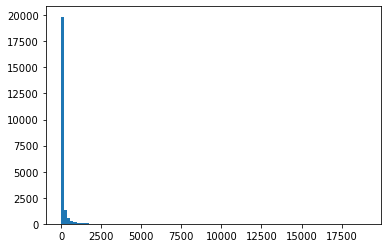

In [105]:
plt.hist(df_acts_users["Revenue"], bins=100)

(array([1.9864e+04, 1.3390e+03, 5.9600e+02, 2.4100e+02, 1.7800e+02,
        1.1600e+02, 4.4000e+01, 4.1000e+01, 3.6000e+01, 1.4000e+01,
        2.7000e+01, 2.1000e+01, 1.5000e+01, 1.7000e+01, 7.0000e+00,
        1.4000e+01, 6.0000e+00, 7.0000e+00, 3.0000e+00, 4.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 5.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.00

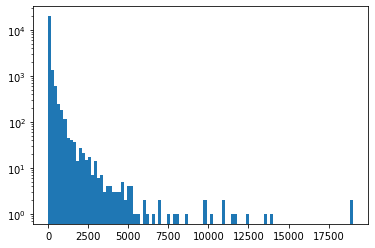

In [102]:
plt.hist(df_acts_users["Revenue"], bins=100, log=True)

(array([7.345e+03, 1.134e+03, 7.930e+02, 6.300e+02, 5.860e+02, 5.610e+02,
        4.700e+02, 6.300e+02, 5.320e+02, 4.830e+02, 3.950e+02, 3.630e+02,
        2.910e+02, 3.230e+02, 3.420e+02, 2.770e+02, 2.890e+02, 2.790e+02,
        3.160e+02, 2.980e+02, 2.820e+02, 3.860e+02, 2.920e+02, 3.240e+02,
        3.270e+02, 3.040e+02, 3.070e+02, 3.090e+02, 3.530e+02, 2.810e+02,
        2.610e+02, 2.470e+02, 2.420e+02, 2.410e+02, 2.410e+02, 2.420e+02,
        1.710e+02, 1.450e+02, 1.450e+02, 1.340e+02, 1.050e+02, 1.180e+02,
        1.300e+02, 8.000e+01, 8.100e+01, 6.400e+01, 7.400e+01, 6.800e+01,
        4.000e+01, 4.700e+01, 4.500e+01, 3.300e+01, 1.500e+01, 1.200e+01,
        8.000e+00, 1.900e+01, 1.100e+01, 5.000e+00, 6.000e+00, 8.000e+00,
        1.000e+01, 7.000e+00, 7.000e+00, 3.000e+00, 6.000e+00, 9.000e+00,
        4.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 6.000e+00,
        8.000e+00, 7.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+0

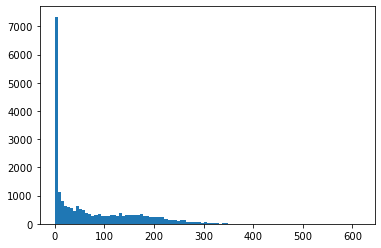

In [126]:
# histogram of days between reg and date
plt.hist(df_acts_users["DaysRegtoDate"] / pd.Timedelta(1, unit='d'), bins=100)

In [114]:
df_acts_one_week = df_acts_users.loc[df_acts_users.loc[:,"DaysRegtoDate"] < pd.Timedelta(7,'D'),:]

In [117]:
df_acts_one_week["Revenue"].mean()

131.2853274336288

In [118]:
df_acts_one_week["Revenue"].median()

42.63

## Block B

In [132]:
# full time period
df_acts_users.groupby("Gender").agg("mean").drop("UserId", axis="columns").reset_index()

,Gender,Revenue
0,F,102.492762
1,M,143.921557


In [133]:
# one week since registration
df_acts_one_week.groupby("Gender").agg("mean").drop("UserId", axis="columns").reset_index()

,Gender,Revenue
0,F,112.653657
1,M,137.196272


In [142]:
import numpy as np

In [146]:
df_acts_one_week.groupby("Gender").agg(np.std, ddof=0).reset_index()[["Gender", "Revenue"]]

,Gender,Revenue
0,F,370.411594
1,M,396.771341


In [137]:
df_acts_one_week["Gender"].value_counts()

M    5576
F    1769
Name: Gender, dtype: int64

In [166]:
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import CompareMeans

In [176]:
males = df_acts_one_week.loc[df_acts_one_week["Gender"] == "M","Revenue"]

In [178]:
females = df_acts_one_week.loc[df_acts_one_week["Gender"] == "F","Revenue"]

In [205]:
print(f"For test of null hypothesis that means are equal, p-value is {ztest(x1=males, x2=females)[1]}, reject null that means are equal")

For test of null hypothesis that means are equal, p-value is 0.02131433312849818, reject null that means are equal


In [ ]:
# assume standard deviations are different?

In [212]:
df_country_diffs = df_acts_one_week.groupby(["Country", "Gender"]).agg("mean").reset_index()[["Gender", "Country", "Revenue"]]

In [213]:
df_country_diffs

,Gender,Country,Revenue
0,F,DE,87.698019
1,M,DE,110.190044
2,F,FR,133.803396
3,M,FR,169.612649
4,F,GB,137.221082
5,M,GB,147.662370
6,F,Other,63.176622
7,M,Other,104.133588
8,F,US,85.753758
9,M,US,143.903677


In [233]:
df_pivot = df_country_diffs.pivot(index="Country", columns="Gender").reset_index()
df_pivot.columns = ["Country", "RevenueFemale", "RevenueMale"]

In [234]:
df_pivot["Delta"] = df_pivot["RevenueMale"] - df_pivot["RevenueFemale"]

In [244]:
df_pivot

,Country,RevenueFemale,RevenueMale,Delta
0,DE,87.698019,110.190044,22.492025
1,FR,133.803396,169.612649,35.809253
2,GB,137.221082,147.662370,10.441289
3,Other,63.176622,104.133588,40.956966
4,US,85.753758,143.903677,58.149919


In [258]:
country = df_pivot.loc[df_pivot["Delta"] == df_pivot["Delta"].max(),"Country"]

In [263]:
print(f"Country with biggest gender difference for revenue is {np.array(country)[0]}")

Country with biggest gender difference for revenue is US


### Linear Regression Model